<a href="https://colab.research.google.com/github/elterco83/Coder_DS1/blob/main/Dataset_Etchezar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introducción

Elegí este dataset porque proporciona una cantidad significativa de datos sobre ventas, lo que permitiría realizar un análisis exhaustivo y obtener conclusiones precisas. También por la oportunidad de aprender sobre análisis de datos, visualización de datos y técnicas estadísticas aplicadas a un caso real.
Este proyecto busca analizar las ventas de Adidas en los Estados Unidos, entre Enero de 2020 y Febrero de 2021. Se podrán examinar las tendencias y patrones en las ventas según variables como método de venta (online, tiendas físicas, outlet), región, ciudad, producto y puntos de venta. Tenemos como objetivo identificar oportunidades de crecimiento y mejorar la estrategia comercial de la marca.

Procederemos a realizar la carga del archivo, como asi tabien la importacion de librerias

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Dataset Pre-Entrega/Ventas_Adidas_USA.xlsx')


Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = df.reset_index(drop=True)
df.set_index('ID_Ventas', inplace=True)
df.head(20)




,fecha,temporada,sexo,retailer,region,estado,ciudad,metodo de venta,producto,precio por unidad,unidades vendidas,ventas totales,ganancia,margen operativo
ID_Ventas,,,,,,,,,,,,,,
FC-000000001,2020-01-01,Invierno,male,Foot Locker,Northeast,New York,New York,In-store,Calzado Urbano,50.0,1200,600000.0,300000.0,0.50
FC-000000002,2020-01-02,Invierno,male,Foot Locker,Northeast,New York,New York,In-store,Calzado Deportivo,50.0,1000,500000.0,150000.0,0.30
FC-000000003,2020-01-03,Invierno,non-binary,Foot Locker,Northeast,New York,New York,In-store,Calzado Urbano,40.0,1000,400000.0,140000.0,0.35
FC-000000004,2020-01-04,Invierno,female,Foot Locker,Northeast,New York,New York,In-store,Calzado Deportivo,45.0,850,382500.0,133875.0,0.35
FC-000000005,2020-01-05,Invierno,male,Foot Locker,Northeast,New York,New York,In-store,Indumentaria,60.0,900,540000.0,162000.0,0.30
FC-000000006,2020-01-06,Invierno,female,Foot Locker,Northeast,New York,New York,In-store,Indumentaria,50.0,1000,500000.0,125000.0,0.25
FC-000000007,2020-01-07,Invierno,female,Foot Locker,Northeast,New York,New York,In-store,Calzado Urbano,50.0,1250,625000.0,312500.0,0.50
FC-000000008,2020-01-08,Invierno,female,Foot Locker,Northeast,New York,New York,Outlet,Calzado Deportivo,50.0,900,450000.0,135000.0,0.30
FC-000000009,2020-01-21,Invierno,female,Foot Locker,Northeast,New York,New York,Outlet,Calzado Urbano,40.0,950,380000.0,133000.0,0.35


**COLUMNAS**



1.   ***ID_Ventas :*** Estas columna la usaremos como indice, y es el codigo identificador de cada venta.
2. ***fecha :*** El dia en cual se realizo la venta.
3. ***temporada:*** Estacion de año correspondiente a la fecha.
2.   ***ID_Cliente :*** Es el codigo identificador del cliente que realizo cada compra.
1.   ***sexo :*** La condicion sexual de cada cliente.
2.   ***retailer :*** Son los puntos de Venta, que intermedian entre la marca y el cliente.

1. ***region :*** Esta columna describe en que Region de USA se realizo la venta.

1.  ***estado :*** Esta columna describe en que Estado de la Region se realizo la venta.
2.  ***ciudad :*** Esta columna describe en que Ciudad de ese Estado se realizo la venta.

8.   ***metodo de venta :*** Hace referencia al formato en el cual se dio la venta, el cual es elegido por el cliente.

9.   ***producto :*** Lo ofrecido por la marca a sus clientes
2.   ***precio por unidad :*** El precio unitario de cada producto.

2.    ***unidades vendidas :*** La cantidad de unidades que tiene cada venta.

1.    ***ventas totales :*** Es el valor total de la factura.
2.   ***ganancia :*** La ganancia monetaria obtenida por la venta.

1.   ***margen operativo :*** Expresa el porcentaje que hay entre ganancia y la venta.





















In [5]:
import pandas as pd
import numpy as np
len(df)

9648

In [6]:
import pandas as pd
import numpy as np
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, FC-000000001 to FC-000009648
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              9648 non-null   datetime64[ns]
 1   temporada          9648 non-null   object        
 2   sexo               9648 non-null   object        
 3   retailer           9648 non-null   object        
 4   region             9648 non-null   object        
 5   estado             9648 non-null   object        
 6   ciudad             9648 non-null   object        
 7   metodo de venta    9648 non-null   object        
 8   producto           9648 non-null   object        
 9   precio por unidad  9648 non-null   float64       
 10  unidades vendidas  9648 non-null   int64         
 11  ventas totales     9648 non-null   float64       
 12  ganancia           9648 non-null   float64       
 13  margen operativo   9648 non-null   float64       

In [7]:
df.describe().round(1)

,fecha,precio por unidad,unidades vendidas,ventas totales,ganancia,margen operativo
count,9648,9648.0,9648.0,9648.0,9648.0,9648.0
mean,2021-05-10 15:20:44.776119296,45.2,256.9,93273.4,34425.2,0.4
min,2020-01-01 00:00:00,7.0,0.0,0.0,0.0,0.1
25%,2021-02-17 00:00:00,35.0,106.0,4254.5,1921.8,0.4
50%,2021-06-04 00:00:00,45.0,176.0,9576.0,4371.4,0.4
75%,2021-09-16 00:00:00,55.0,350.0,150000.0,52062.5,0.5
max,2021-12-31 00:00:00,110.0,1275.0,825000.0,390000.0,0.8
std,NaN,14.7,214.3,141916.0,54193.1,0.1


# ***OBJETIVO 1***

*Identificar los meses con mayores ventas*

Analizaremos las causas detras de éstos picos, con el proposito de optimizar las campañas de marketing y estrategias de venta según las temporadas más y menos rentables.

In [73]:
# Extraemos el mes de la fecha
df["mes"] = df["fecha"].dt.month

# Agrupamos los datos por mes, calculamos la suma de ventas totales
ventas_por_mes = df.groupby("mes")["ventas totales"].sum().reset_index()
styled_df = ventas_por_mes.style.set_table_styles([
    {"selector": "thead", "props": [("background-color", "#d3d3d3"), ("color", "black"), ("font-weight", "bold")]},
    {"selector": "tbody tr:nth-child(even)", "props": [("background-color", "#f2f2f2")]},
    {"selector": "tbody tr:nth-child(odd)", "props": [("background-color", "#ffffff")]}
]).set_caption("Ventas Totales por Mes")
display(styled_df)

,mes,ventas totales
0,1,71479142
1,2,61100153
2,3,56809109
3,4,72339970
4,5,80507695
5,6,74747372
6,7,95480694
7,8,92166201
8,9,77661459
9,10,63911033


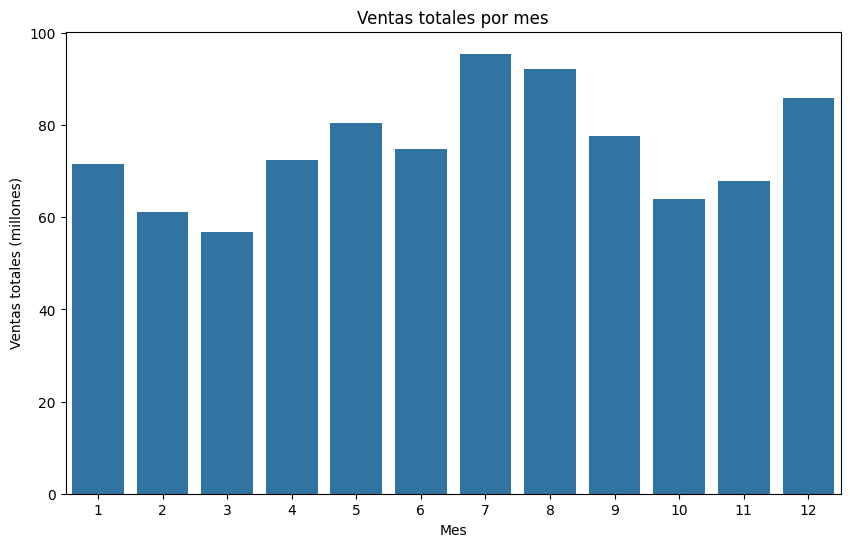

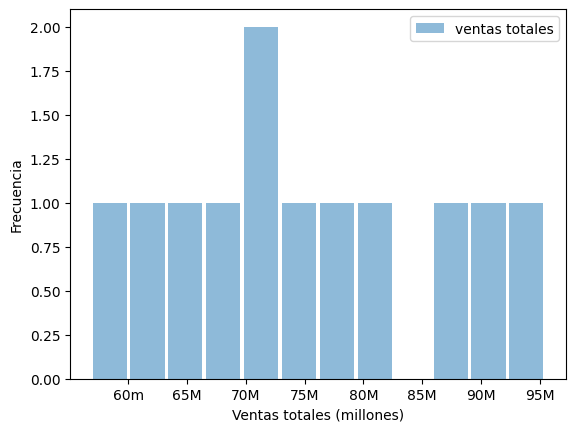

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Se crea un gráfico de barras para mostrar los meses con mayores ventas
plt.figure(figsize=(10, 6))
sns.barplot(x="mes", y="ventas totales", data=ventas_por_mes)
plt.title("Ventas totales por mes")
plt.xlabel("Mes")
plt.ylabel("Ventas totales (millones)")
plt.yticks([0, 2e7, 4e7, 6e7, 8e7, 1e8], ['0', '20', '40', '60', '80', '100'])
plt.show()

#Histogrma
plt.hist(ventas_por_mes['ventas totales'], bins=12, rwidth=0.9, alpha=0.5, label='ventas totales')
plt.xticks([6e7, 6.5e7, 7e7, 7.5e7, 8e7, 8.5e7, 9e7, 9.5e7],
            ['60m', '65M', '70M', '75M', '80M', '85M', '90M', '95M'])
plt.xlabel('Ventas totales (millones)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()





In [69]:
print(df.dtypes)

fecha                datetime64[ns]
temporada                    object
sexo                         object
retailer                     object
region                       object
estado                       object
ciudad                       object
metodo de venta              object
producto                     object
precio por unidad           float64
unidades vendidas             int64
ventas totales                int64
ganancia                    float64
margen operativo            float64
mes                           int32
dtype: object


# ***OBJETIVO 2***

*Analizar la efectividad de los métodos de venta para diferentes categorías de productos e identificar oportunidades para mejorar la eficiencia*

Intentaremos con este analisis reforzar los canales más rentables para cada tipo de producto y brindar al cliente una recomendación específica para potenciar los mismos.


,metodo de venta,producto,ventas totales
0,In-store,Calzado Deportivo,"99,868,750.0"
1,In-store,Calzado Urbano,"137,201,250.0"
2,In-store,Indumentaria,"119,573,750.0"
3,Online,Calzado Deportivo,"71,309,076.0"
4,Online,Calzado Urbano,"91,071,656.0"
5,Online,Indumentaria,"85,292,150.0"
6,Outlet,Calzado Deportivo,"89,127,750.0"
7,Outlet,Calzado Urbano,"108,556,151.0"
8,Outlet,Indumentaria,"97,901,592.0"


<Figure size 1000x600 with 0 Axes>

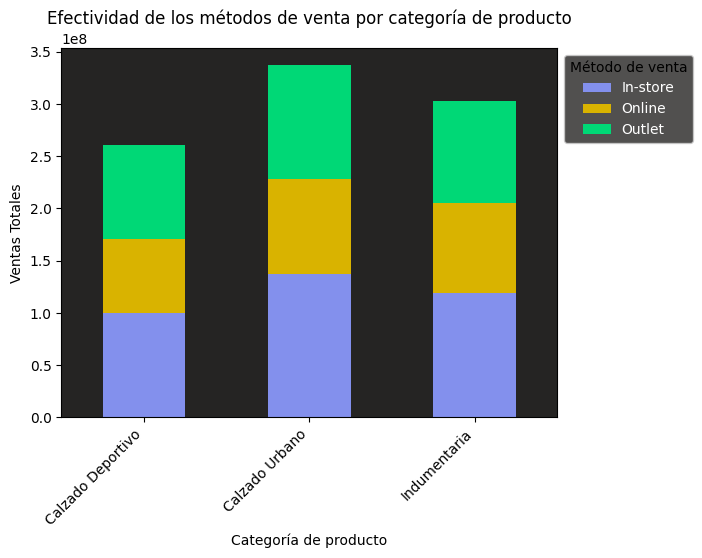

<ipython-input-94-0928af768c99>:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df.loc[df['metodo de venta'] == método]['ventas totales'] for método in df['metodo de venta'].unique()],


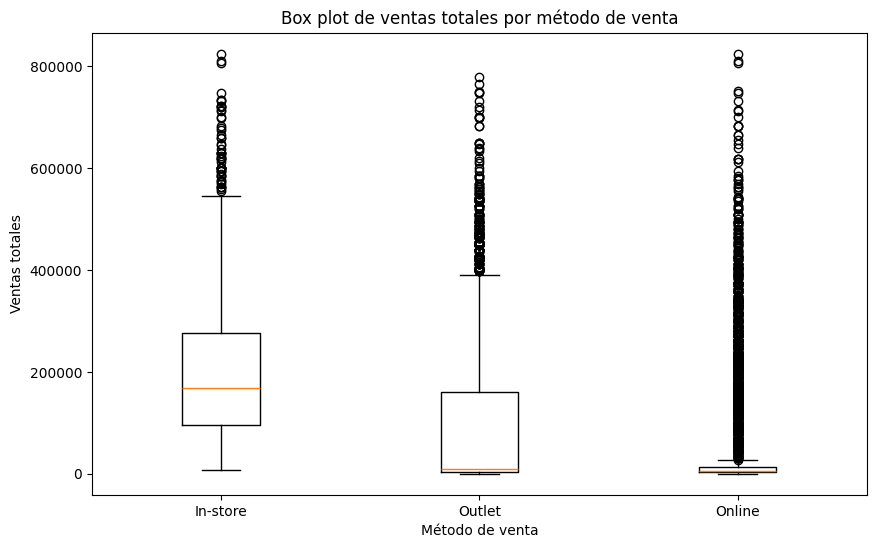

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
from IPython.display import display, HTML


#Hacemos un groupby con pandas
ventas_resumen_grupo = df.groupby(['metodo de venta', 'producto'])['ventas totales'].sum().reset_index()
ventas_resumen_grupo['ventas totales'] = ventas_resumen_grupo['ventas totales'].apply(lambda x: format(x, ',.1f'))
styled_df = ventas_resumen_grupo.style.set_table_styles([
    {"selector": "thead", "props": [("background-color", "#d3d3d3"), ("color", "black"), ("font-weight", "bold")]},
    {"selector": "tbody tr:nth-child(even)", "props": [("background-color", "#f2f2f2")]},
    {"selector": "tbody tr:nth-child(odd)", "props": [("background-color", "#ffffff")]}
]).set_caption("Ventas Totales por Método de Venta y Categoría de Producto")

display(styled_df)

# Procedemos a crar un gráfico de barras apiladas para visualizar la efectividad de los métodos de venta
plt.figure(figsize=(10, 6))
ventas_por_metodo = df.pivot_table(index='producto', columns='metodo de venta', values='ventas totales', aggfunc='sum')
ventas_por_metodo.plot(kind='bar', stacked=True, color=['#8390ED','#D9B300','#00D876'])
plt.xlabel('Categoría de producto')
plt.ylabel('Ventas Totales')
plt.title('Efectividad de los métodos de venta por categoría de producto')
plt.legend(title='Método de venta', loc='upper left', bbox_to_anchor=(1, 1),labelcolor='white', facecolor='#252423')
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.set_facecolor('#252423')
plt.show()

# Crea el box plot
plt.figure(figsize=(10,6))
plt.boxplot([df.loc[df['metodo de venta'] == método]['ventas totales'] for método in df['metodo de venta'].unique()],
             labels=df['metodo de venta'].unique())
plt.xlabel('Método de venta')
plt.ylabel('Ventas totales')
plt.title('Box plot de ventas totales por método de venta')
plt.show()






# ***OBJETIVO 3***

*Análisis de la relación entre el sexo del cliente y el tipo de producto por temporada*

El objetivo es examinar cómo el sexo del cliente influye en la elección del tipo de producto en diferentes temporadas. Se analizarán los patrones de compra de hombres, mujeres y personas no binarias en diferentes momentos del año, con el fin de identificar oportunidades para mejorar la experiencia del cliente y aumentar las ventas."





In [62]:
ventas_temporada = df.groupby('temporada')['ventas totales'].sum().reset_index()
print(ventas_temporada)

   temporada  ventas totales
0   Invierno     200176502.0
1      Otoño     213926739.0
2  Primavera     215640018.0
3     Verano     270158866.0


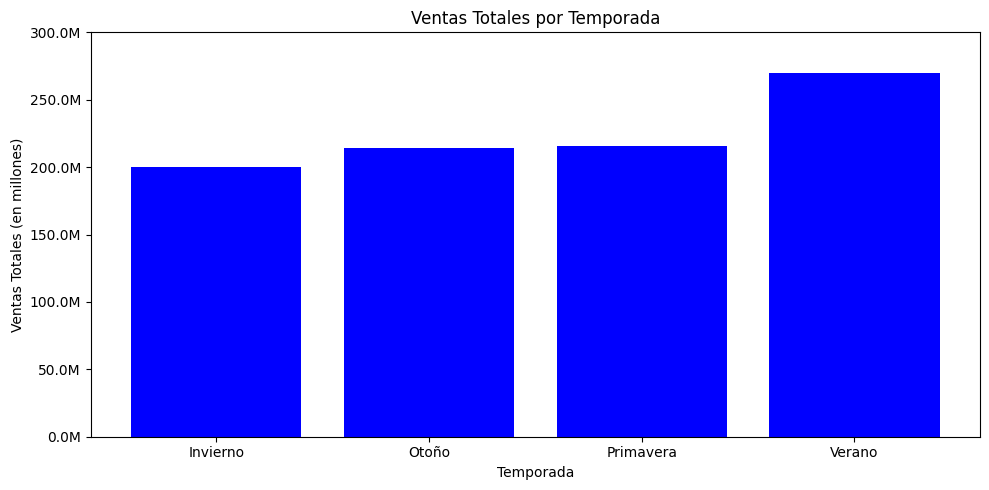

In [66]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(ventas_por_temporada['temporada'], ventas_por_temporada['Ventas Totales'], color='blue')

# Configurar etiquetas y título
plt.title('Ventas Totales por Temporada', fontsize=12)
plt.xlabel('Temporada', fontsize=10)
plt.ylabel('Ventas Totales (en millones)', fontsize=10)

# Configurar la escala del eje Y y simplificar etiquetas
max_value = ventas_por_temporada['Ventas Totales'].max()
step = 50000000  # Intervalo de 50 millones
plt.ylim(0, max_value * 1.1)  # Un poco más alto que el valor máximo
plt.yticks(ticks=range(0, int(max_value) + step, step),
           labels=[f"{x/1e6:.1f}M" for x in range(0, int(max_value) + step, step)])

# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [ ]:
print(df['Ventas Totales'].describe())

count      9648.000000
mean      93273.437500
std      141916.016727
min           0.000000
25%        4254.500000
50%        9576.000000
75%      150000.000000
max      825000.000000
Name: Ventas Totales, dtype: float64


In [ ]:
print(ventas_temporada.head())
print(ventas_temporada.info())

   temporada  Ventas Totales
0   Invierno     200176502.0
2  Primavera     215640018.0
3     Verano     270158866.0
1      Otoño     213926739.0
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 1
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   temporada       4 non-null      category
 1   Ventas Totales  4 non-null      float64 
dtypes: category(1), float64(1)
memory usage: 272.0 bytes
None


In [ ]:
print(ventas_por_temporada)


   temporada  Ventas Totales
0   Invierno     200176502.0
1      Otoño     213926739.0
2  Primavera     215640018.0
3     Verano     270158866.0
